In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [38]:
# data load korlam
df = pd.read_csv('/content/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.shape


(60000, 785)

In [40]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [41]:
# sample kortesi mane kete choto kor feltesi . 30% nicchi just 100% theke .
df=df.sample(frac=0.3).reset_index(drop=True)

In [42]:
LOOKUP = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# image showing

In [43]:
def display_image(features, actual_label):
  print("the actual image is : ", LOOKUP[actual_label])
  plt.imshow(features.reshape(28,28), cmap='gray')



the actual image is :  Shirt


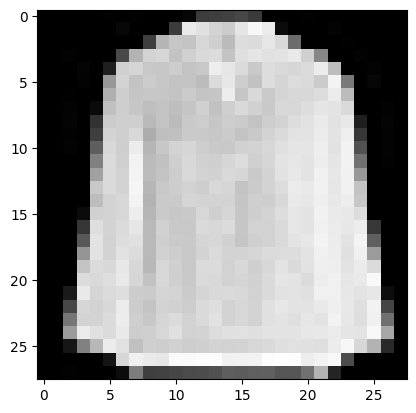

In [44]:
display_image(x.loc[5].values, y.loc[5])

the actual image is :  Sandal


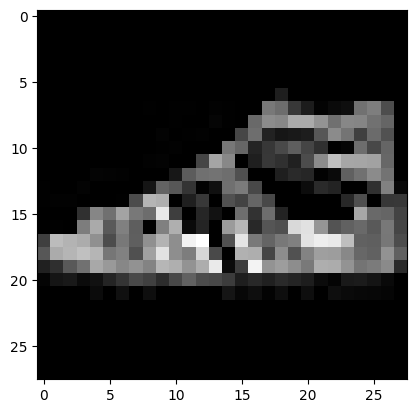

In [45]:
display_image(x.loc[500].values, y.loc[500])

In [46]:
x.loc[500].values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
len(x.loc[500].values)

784

In [48]:
y.loc[5]

np.int64(6)

#  Split features and labels

In [49]:
x= df[df.columns[1:]]
y= df['label']

In [50]:
print(x)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       2   
1           0       0       2       0      15      57      21      14      13   
2           0       0       0       0       0       0       0       1       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
17995       0       0       0       0       0       0       0       0       0   
17996       0       0       0       0       0       0       0       0       0   
17997       0       0       0       0       0       0       0       1      41   
17998       0       0       0       0       0       0       0       0       0   
17999       0       0       0       0       0       0       1       0       0   

       pixel10  ...  pixel7

In [51]:
print(y)

0        6
1        6
2        0
3        8
4        3
        ..
17995    8
17996    0
17997    2
17998    7
17999    0
Name: label, Length: 18000, dtype: int64


In [52]:
# normalize korlam pixel values ke
x=x/255
x.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.007843,0.003922,...,0.000000,0.000000,0.000000,0.007843,0.023529,0.007843,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.007843,0.0,0.058824,0.223529,0.082353,0.054902,0.050980,0.050980,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.003922,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,...,0.596078,0.611765,0.066667,0.000000,0.015686,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.690196,0.749020,0.694118,0.717647,0.749020,0.086275,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.592157,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


#Train-test split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [54]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
11645,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.007843,0.015686,...,0.000000,0.000000,0.000000,0.000000,0.349020,0.266667,0.196078,0.000000,0.0,0.0
12822,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
13568,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.231373,0.098039,0.019608,0.000000,0.0,0.0
13487,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
15596,0.0,0.000000,0.000000,0.0,0.003922,0.007843,0.0,0.000000,0.000000,0.000000,...,0.250980,0.090196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.498039,0.043137,0.019608,...,0.474510,0.431373,0.247059,0.223529,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3022,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.113725,0.517647,...,0.478431,0.584314,0.317647,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
14769,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.007843,0.000000,...,0.000000,0.000000,0.000000,0.129412,0.603922,0.529412,0.000000,0.000000,0.0,0.0
17944,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.007843,0.007843,0.000000,...,0.000000,0.000000,0.000000,0.345098,0.411765,0.078431,0.000000,0.000000,0.0,0.0


In [55]:
y_train

,label
11645,6
12822,7
13568,6
13487,1
15596,6
...,...
15149,0
3022,3
14769,4
17944,2


In [56]:
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
5124,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.007843,0.003922,0.003922,...,0.000000,0.000000,0.000000,0.619608,0.411765,0.0,0.0,0.0,0.0,0.0
10797,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.317647,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
17273,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6385,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.011765,0.921569,...,0.109804,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2024,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.568627,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3317,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10305,0.0,0.0,0.0,0.0,0.003922,0.023529,0.000000,0.000000,0.000000,0.000000,...,0.678431,0.584314,0.533333,0.415686,0.000000,0.0,0.0,0.0,0.0,0.0


In [57]:
y_test

,label
5124,4
10797,1
17273,8
6385,1
2024,1
...,...
3832,8
4147,9
3317,5
10305,6


In [58]:
# Now checking the shape of training and testing data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(14400, 784) (14400,)
(3600, 784) (3600,)


In [59]:
# defining a function for summarizing the classification of the prediction accuracy on various factors
def summarize_classification(y_test, y_pred, average_method='weighted'):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    prec = precision_score(y_test, y_pred, average=average_method)
    recall = recall_score(y_test, y_pred, average=average_method)
    print("Test data count: ", len(y_test))
    print("accuracy_count : ", num_acc)
    print("accuracy_score : ", acc)
    print("precision_score : ", prec)
    print("recall_score : ", recall)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Train logistic regression
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000)
logistic_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='auto', solver='sag')

In [61]:
# Predict using the model
y_pred = logistic_model.predict(x_test)

In [62]:
## Print the classification report
print(classification_report(y_test, y_pred))
summarize_classification(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       371
           1       0.98      0.96      0.97       373
           2       0.74      0.72      0.73       364
           3       0.85      0.85      0.85       336
           4       0.72      0.76      0.74       365
           5       0.91      0.89      0.90       385
           6       0.57      0.55      0.56       319
           7       0.90      0.92      0.91       369
           8       0.94      0.93      0.93       359
           9       0.93      0.94      0.94       359

    accuracy                           0.84      3600
   macro avg       0.83      0.83      0.83      3600
weighted avg       0.84      0.84      0.84      3600

Test data count:  3600
accuracy_count :  3019.0
accuracy_score :  0.8386111111111111
precision_score :  0.8386273956308498
recall_score :  0.8386111111111111


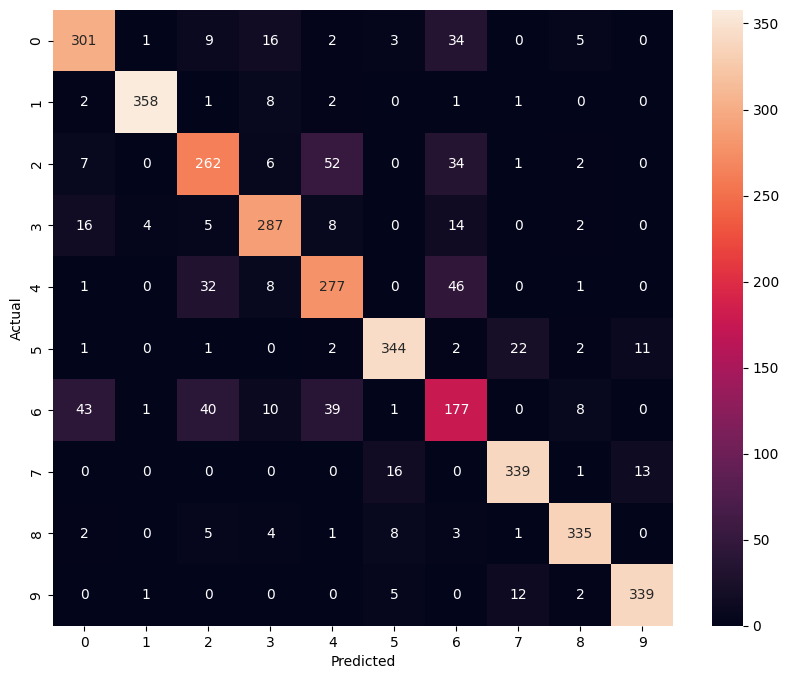

In [63]:
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# load korar zonno

In [65]:
from joblib import dump, load
from sklearn.linear_model import LogisticRegression

# Let's say you have trained a logistic regression model named 'logistic_model'
# logistic_model = LogisticRegression().fit(X_train, y_train)

# How to save the model to a file
dump(logistic_model, 'logistic_model.joblib')

# Later on, you can load the model back into memory with:
loaded_model = load('logistic_model.joblib')

# And then you can use loaded_model to make predictions
# predictions = loaded_model.predict(X_test)

In [ ]:
# Initializing logistic regression with the 'sag' solver, multi_class set to 'auto', and a maximum of 10000 iterations
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

# Making prediction using the model we trained just above.
y_pred = logistic_model.predict(x_test)
print(y_pred)

# Summarizing the classification we have performed
summarize_classification(y_test, y_pred)

# This output is a printed summary from the summarize_classification function

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
